# **Loan Default Prediction Project Overview**
This project aims to build a predictive model to identify high-risk loan applicants, helping financial institutions assess the likelihood of a loan default. The objective is to utilize historical loan application data, including personal details, loan amounts, and credit history, to predict whether an applicant will default or not. By doing so, financial institutions can make more informed decisions and mitigate the risk of loan defaults.

## 1. Data Collection and Preprocessing
* Dataset: The dataset contains applicant details (e.g., age, income, credit history) and loan information (loan amount, status).

In [1]:
import pandas as pd

# load the dataset
df=pd.read_csv("F:\Machine Learning all Algorithms\Previous Company Project\Loan Default Prediction\Loan_default.csv")

#display basic info
print(df.head())
print(df.info())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

### Data preprocessing

In [2]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop unique identifier column
df = df.drop(columns=['LoanID'])

# Handle missing values (if any) by filling with median for numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Apply one-hot encoding only to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define numerical columns for scaling
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                  'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Scale the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate features and target variable
X = df.drop(columns=['Default'])
y = df['Default']


## 2. Exploratory Data Analysis (EDA)
* Perform EDA to understand patterns, distributions, and relationships within the data, which can provide insights into factors influencing loan default.

In [4]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')


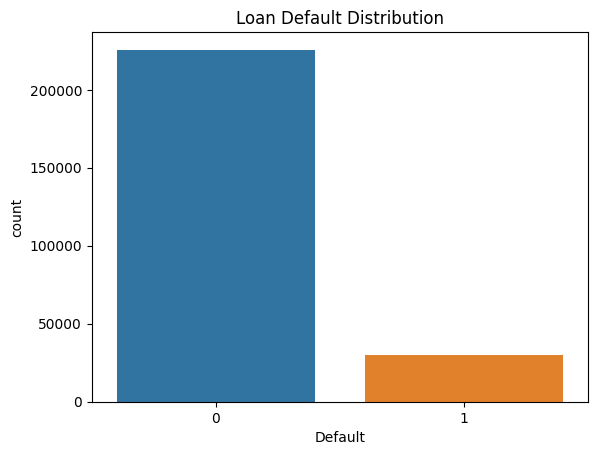

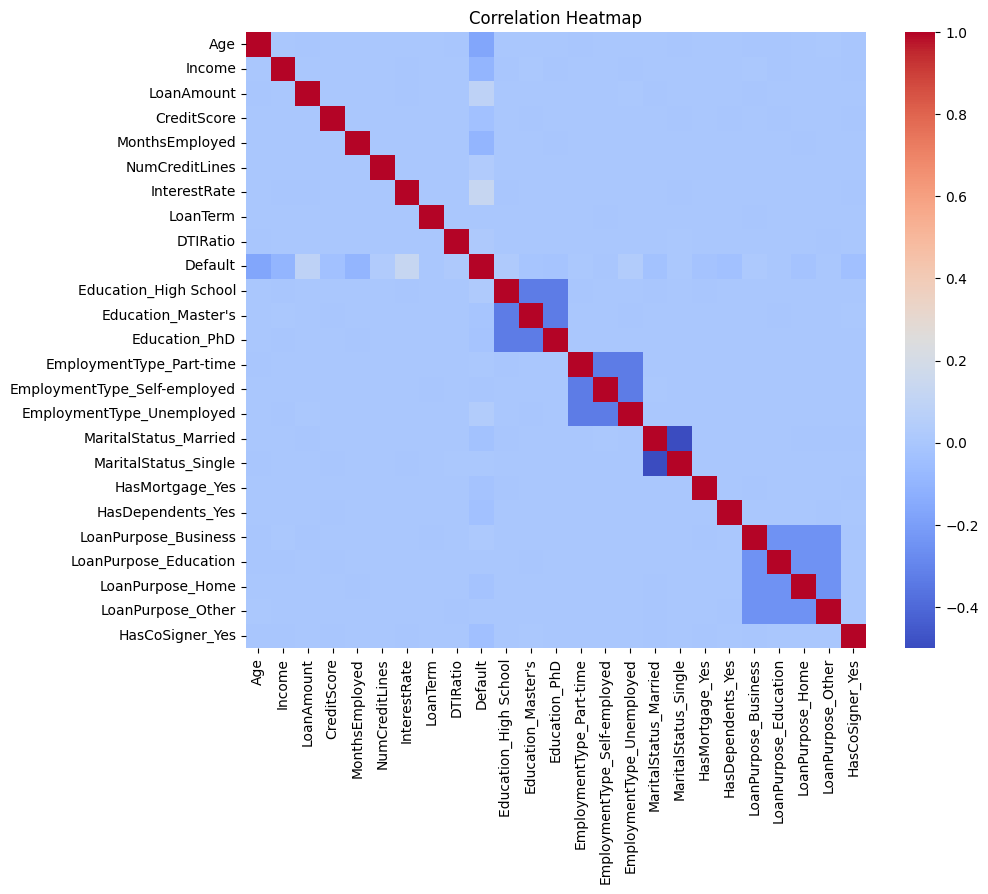

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
sns.countplot(x='Default', data=df)
plt.title('Loan Default Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


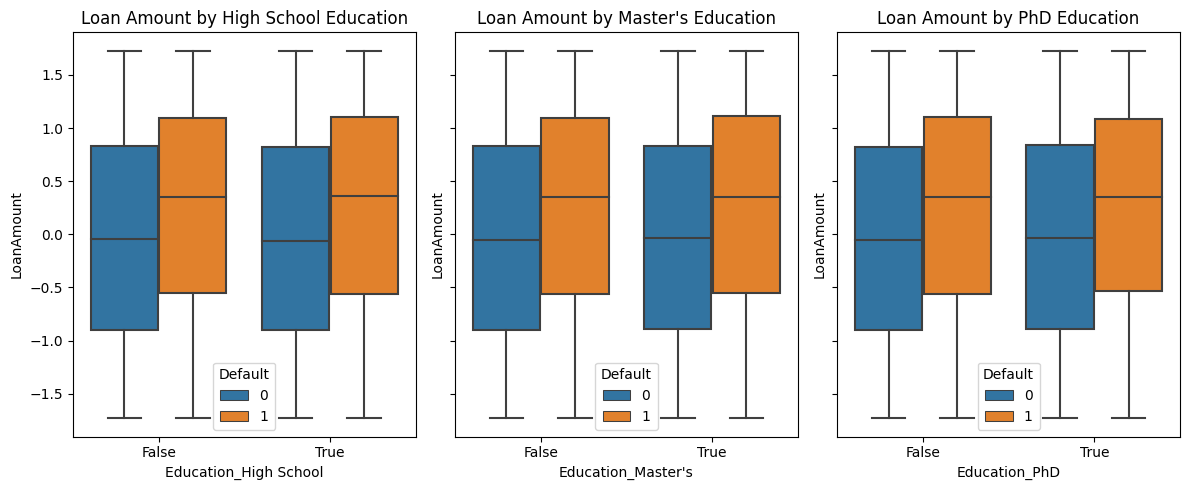

In [6]:
# Loan Amount by Education Level
# Education got split into ['Education_High School', 'Education_Master's', 'Education_PhD'] due to one hot encoding
# Create subplots for each education level

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each education level
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

sns.boxplot(x='Education_High School', y='LoanAmount', hue='Default', data=df, ax=axes[0])
axes[0].set_title('Loan Amount by High School Education')

sns.boxplot(x="Education_Master's", y='LoanAmount', hue='Default', data=df, ax=axes[1])
axes[1].set_title("Loan Amount by Master's Education")

sns.boxplot(x='Education_PhD', y='LoanAmount', hue='Default', data=df, ax=axes[2])
axes[2].set_title('Loan Amount by PhD Education')

plt.tight_layout()
plt.show()


### Explanation: Visualizing the target distribution helps assess class balance, which influences model selection. The heatmap shows correlations between features, helping identify highly related variables. Boxplots give insights into relationships, such as how loan amount varies by Education level and Default status.

## 3. Model Development
* Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

* Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

* Logistic Regression is used as a baseline classifier, where max_iter=1000 ensures convergence even with complex data.

In [15]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(reg, X_train, y_train, cv=5, scoring='roc_auc')
print("Mean CV AUC:", cv_scores.mean())

Mean CV AUC: 0.7469022978153423


* Cross-validation assesses the model’s robustness and helps avoid overfitting by averaging performance across different training subsets.

## 4. Model Evaluation
* Evaluate the model using metrics that provide insight into its predictive performance.


In [18]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predictions
y_pred=reg.predict(X_test)
y_pred_proba=reg.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC score
auc_score=roc_auc_score(y_test,y_pred_proba)
print("Test ROC-AUC Score:", auc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.62      0.03      0.06      8924

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.50     76605
weighted avg       0.86      0.89      0.84     76605

confusion_matrix:
 [[67492   189]
 [ 8618   306]]
Test ROC-AUC Score: 0.74920163446907


1. Classification Report
This report gives detailed statistics on the performance of your classification model. It includes the following metrics for each class (0 and 1) as well as average metrics for the model:

Precision: The percentage of true positive predictions (correct defaulters) out of all positive predictions (predicted defaulters).

Precision for class 0 (Non-Defaulters): 0.89 – This means that when the model predicts non-default, 89% of the time it is correct.
Precision for class 1 (Defaulters): 0.62 – This means that when the model predicts default, 62% of the time it is correct.
Recall: The percentage of true positive predictions (correct defaulters) out of all actual positives (actual defaulters).

Recall for class 0 (Non-Defaulters): 1.00 – This means that all actual non-defaulters were correctly predicted by the model.
Recall for class 1 (Defaulters): 0.03 – This is very low, indicating that only 3% of the actual defaulters were correctly identified by the model.
F1-Score: The harmonic mean of precision and recall. It’s a combined measure that considers both false positives and false negatives.

F1-Score for class 0 (Non-Defaulters): 0.94 – A good F1 score, meaning that for non-defaulters, the model is quite accurate.
F1-Score for class 1 (Defaulters): 0.06 – A very poor F1 score for defaulters, meaning the model has difficulty predicting defaulters accurately.
Support: The number of occurrences of each class in the test set.

Support for class 0 (Non-Defaulters): 67,681
Support for class 1 (Defaulters): 8,924
Overall accuracy: 0.89 – This means that 89% of the total predictions are correct, but accuracy alone doesn’t tell the whole story in imbalanced datasets like this one (where defaulters are much less frequent).

Macro Average:

Precision: 0.75
Recall: 0.52
F1-Score: 0.50
These averages are computed for both classes (0 and 1), without considering class imbalance, and give a general overview of the model’s performance.
Weighted Average: The weighted average takes into account the number of samples in each class:

Precision: 0.86
Recall: 0.89
F1-Score: 0.84
This suggests that the model performs better on class 0 (non-defaulters), which is likely because it has many more instances in the dataset.

2. Confusion Matrix
The confusion matrix provides a detailed breakdown of the model’s performance by showing how many samples were classified into each of the four categories:

True Negatives (TN): 67,492 – These are the non-defaulters who were correctly predicted as non-defaulters.
False Positives (FP): 189 – These are non-defaulters who were incorrectly predicted as defaulters (Type I error).
False Negatives (FN): 8,618 – These are defaulters who were incorrectly predicted as non-defaulters (Type II error).
True Positives (TP): 306 – These are defaulters who were correctly predicted as defaulters.
This highlights a severe issue with classifying defaulters, as the model only identified 306 defaulters out of 8,924 actual defaulters (indicating poor recall for the default class).

3. ROC-AUC Score
ROC-AUC stands for the Receiver Operating Characteristic - Area Under the Curve. It is a measure of how well the model distinguishes between the classes (non-default and default). The higher the ROC-AUC score, the better the model.

Test ROC-AUC Score: 0.7492 – This means that the model has a good ability to distinguish between defaulters and non-defaulters, but it is not perfect. A score above 0.7 is generally considered decent, and a score close to 1.0 would indicate a near-perfect model.
Key Insights:
Class Imbalance Problem: The model has difficulty identifying defaulters because there are far fewer defaulters than non-defaulters in the dataset. This is reflected in the low recall for class 1 (defaulters), where only 3% of actual defaulters are correctly predicted.

Precision vs Recall: The model has good precision for predicting non-defaulters, but its recall for defaulters is very poor. This suggests that the model is conservative when predicting defaulters and misses most of them.

Improvement Areas: The model’s ability to identify defaulters can be improved by addressing the class imbalance. Techniques like:

Oversampling the minority class (defaulters)
Undersampling the majority class (non-defaulters)
Using algorithms like Random Forest or XGBoost that handle class imbalance better
Adjusting class weights in the model could help improve the recall and F1 score for the defaulter class.